In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
field = ['open', 'high', 'low', 'close']

In [3]:
data = pd.read_csv('CONTEST_DATA_IN_SAMPLE_1.csv', header=None)

In [4]:
data.columns = ['sequence','code','open', 'high', 'low', 'close', 'volume']
data = data.set_index('sequence')
data.head()

,code,open,high,low,close,volume
sequence,,,,,,
0,1000,19.96632,19.96632,19.06278,19.18884,299216
0,1001,33.59400,33.59400,33.59400,33.59400,0
0,1002,84.11766,84.76446,81.01170,84.50574,233872
0,1003,5.54400,5.54400,5.27340,5.27340,19200
0,1004,198.46200,203.41200,195.69000,203.41200,6736


In [5]:
all_codes = data['code'].unique().tolist() 
all_sequence = data.index.unique().tolist()

In [6]:
high = pd.DataFrame(index=all_sequence, columns=all_codes)
low = pd.DataFrame(index=all_sequence, columns=all_codes)
opn = pd.DataFrame(index=all_sequence, columns=all_codes)
close = pd.DataFrame(index=all_sequence, columns=all_codes)
volume = pd.DataFrame(index=all_sequence, columns=all_codes)

In [7]:
for code in all_codes:
    high[code] = data[data['code'] == code]['high']
    low[code] = data[data['code'] == code]['low']
    opn[code] = data[data['code'] == code]['open']
    close[code] = data[data['code'] == code]['close']
    volume[code] = data[data['code'] == code]['volume']

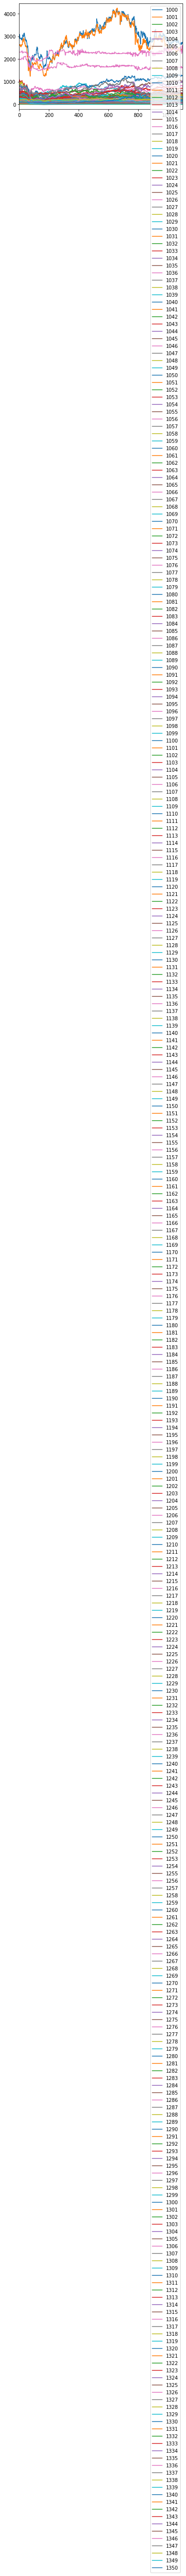

In [8]:
close.plot() 
plt.show()

In [9]:
from tslearn.clustering import TimeSeriesKMeans

/Users/wangyanpeng/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit(close)

In [11]:
km_dba.cluster_centers_

array([[[ 27.10816105],
        [ 93.33749295],
        [121.99829107],
        ...,
        [235.50566319],
        [144.59833159],
        [187.77579352]],

       [[ 16.57919338],
        [ 28.58713744],
        [ 80.0811271 ],
        ...,
        [200.74480105],
        [ 79.42838647],
        [ 91.01400658]],

       [[ 17.48441698],
        [193.97663585],
        [ 95.68490509],
        ...,
        [230.0104566 ],
        [135.25683019],
        [261.0460766 ]]])

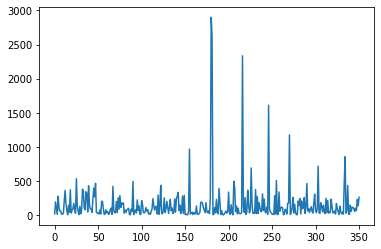

In [18]:
plt.plot(km_dba.cluster_centers_[2].reshape(-1))